# **Problem 1**

In [59]:
#importing libraries & mounting from google drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
file_path = "/content/drive/MyDrive/Class/Intro-to-ML-main/Datasets/diabetes.csv"
data = pd.read_csv(file_path)
data.head( )

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
#split data into features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [62]:
#train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
#data scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
#initialize logistic regression model
model = LogisticRegression(max_iter=1500)

In [65]:
#capture training and validation accuracy over epochs using Learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 50))

In [66]:
#calculate std and mean of training/test score
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

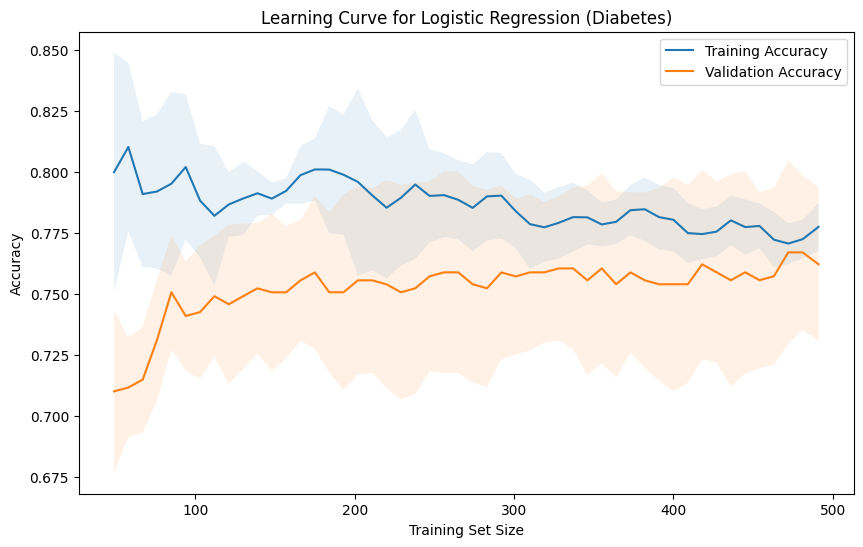

In [70]:
#plotting learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Logistic Regression (Diabetes)')
plt.legend()
plt.show()

In [71]:
#training final LR model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1500)

In [72]:
#eval on test data
y_test_pred = model.predict(X_test)

#calculate performance metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.75
Precision: 0.65
Recall: 0.67
F1 Score: 0.66


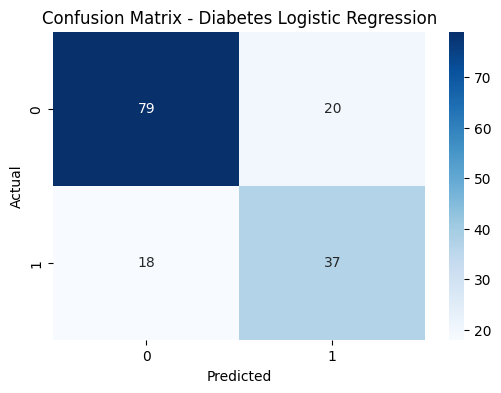

In [73]:
#plotting confusing matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Diabetes Logistic Regression")
plt.show()

# **Problem 2**

In [74]:
from sklearn.datasets import load_breast_cancer

In [75]:
#loading cancer dataset
cdata = load_breast_cancer()
Xc = cdata.data
yc = cdata.target

#splitting 80/20
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)

In [76]:
#scaling
scaler = StandardScaler()
Xc_train = scaler.fit_transform(Xc_train)
Xc_test = scaler.transform(Xc_test)

In [77]:
#logistic regression with L2 regularization
logistic_model = LogisticRegression(max_iter=1500, penalty='l2', solver='liblinear')
logistic_model.fit(Xc_train, yc_train)

LogisticRegression(max_iter=1500, solver='liblinear')

In [78]:
#prections/evaluation
y_pred = logistic_model.predict(Xc_test)
accuracy = accuracy_score(yc_test, y_pred)
precision = precision_score(yc_test, y_pred)
recall = recall_score(yc_test, y_pred)
f1 = f1_score(yc_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.97
Precision: 0.97
Recall: 0.99
F1 Score: 0.98


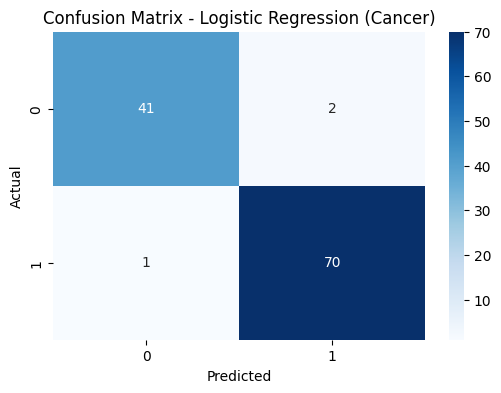

In [79]:
#confusion matrix
conf_matrix = confusion_matrix(yc_test, y_pred)

#plotting
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Cancer)")
plt.show()

# **Problem 3**

In [80]:
from sklearn.naive_bayes import GaussianNB

In [81]:
#naive bayes model
nb_model = GaussianNB()
nb_model.fit(Xc_train, yc_train)

GaussianNB()

In [82]:
#prediction/evalution
y_pred = nb_model.predict(Xc_test)
accuracy = accuracy_score(yc_test, y_pred)
precision = precision_score(yc_test, y_pred)
recall = recall_score(yc_test, y_pred)
f1 = f1_score(yc_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.96
Precision: 0.96
Recall: 0.99
F1 Score: 0.97


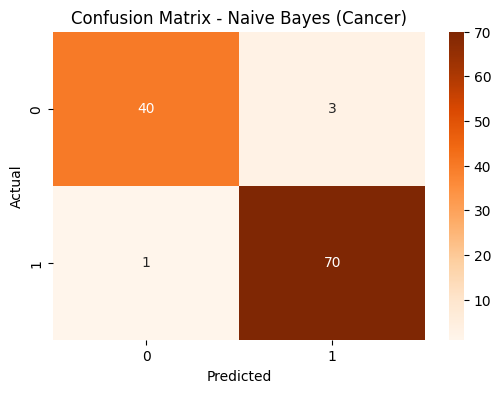

In [83]:
#confusion Matrix
conf_matrix = confusion_matrix(yc_test, y_pred)

#plotting
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes (Cancer)")
plt.show()

# **Problem 4**

In [84]:
from sklearn.decomposition import PCA

In [85]:
#applying PCA and experiment with different components
#initialize list to store results
results = []
#iterate over different number of PCA (k )
for k in range(1, Xc_train.shape[1] + 1):
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(Xc_train)
    X_test_pca = pca.transform(Xc_test)
  #train LR on pca data
    model = LogisticRegression(max_iter=1500)
    model.fit(X_train_pca, yc_train)
    y_pred = model.predict(X_test_pca)
  #perfomance matrix
    accuracy = accuracy_score(yc_test, y_pred)
    precision = precision_score(yc_test, y_pred)
    recall = recall_score(yc_test, y_pred)
    f1 = f1_score(yc_test, y_pred)
    #storing result
    results.append((k, accuracy, precision, recall, f1))

In [86]:
# conerting to nb array
results = np.array(results)

In [87]:
#print
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.97
Precision: 0.97
Recall: 0.99
F1 Score: 0.98


In [88]:
#identifying optimal number of K with highest accuracy
best_k = results[np.argmax(results[:, 1]), 0]
best_accuracy = np.max(results[:, 1])
print(f"Optimum number of components (K): {int(best_k)}, with Accuracy: {best_accuracy:.2f}")

Optimum number of components (K): 2, with Accuracy: 0.99


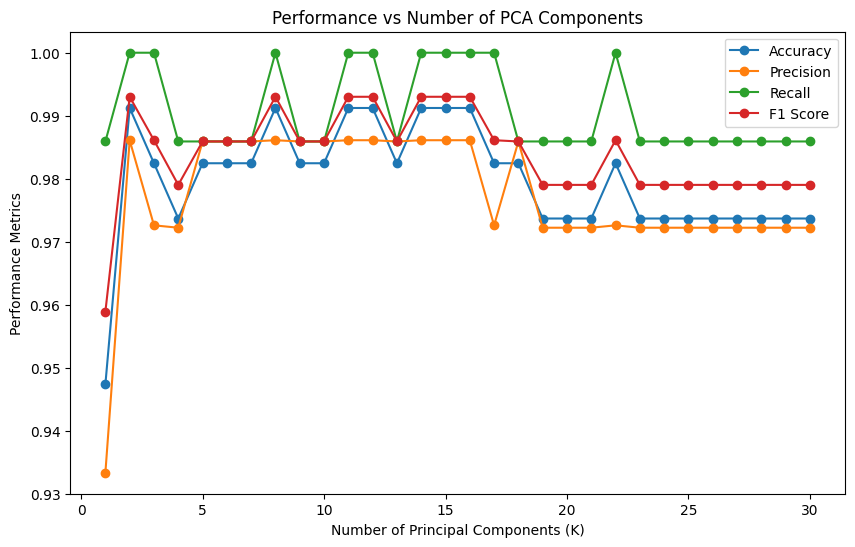

In [89]:
#plotting performance matrix
plt.figure(figsize=(10, 6))
plt.plot(results[:, 0], results[:, 1], label='Accuracy', marker='o')
plt.plot(results[:, 0], results[:, 2], label='Precision', marker='o')
plt.plot(results[:, 0], results[:, 3], label='Recall', marker='o')
plt.plot(results[:, 0], results[:, 4], label='F1 Score', marker='o')

plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Performance Metrics')
plt.title('Performance vs Number of PCA Components')
plt.legend()
plt.show()

# **Problem 5**

In [90]:
#initializing list
results = []

In [91]:
#iterate over different K
for k in range(1, Xc_train.shape[1] + 1):
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(Xc_train)
    X_test_pca = pca.transform(Xc_test)

    #train LR on PCA data
    model = GaussianNB()
    model.fit(X_train_pca, yc_train)
    y_pred = model.predict(X_test_pca)

    #performance matrix
    accuracy = accuracy_score(yc_test, y_pred)
    precision = precision_score(yc_test, y_pred)
    recall = recall_score(yc_test, y_pred)
    f1 = f1_score(yc_test, y_pred)

    #storing result
    results.append((k, accuracy, precision, recall, f1))

In [92]:
#convert to numpy array
results = np.array(results)
#identifying optimal k
best_k = int(results[np.argmax(results[:, 1]), 0])
best_accuracy = np.max(results[:, 1])
print(f"Optimum number of components (K) for Logistic Regression: {int(best_k)}, Accuracy: {best_accuracy:.2f}")

Optimum number of components (K) for Logistic Regression: 2, Accuracy: 0.95


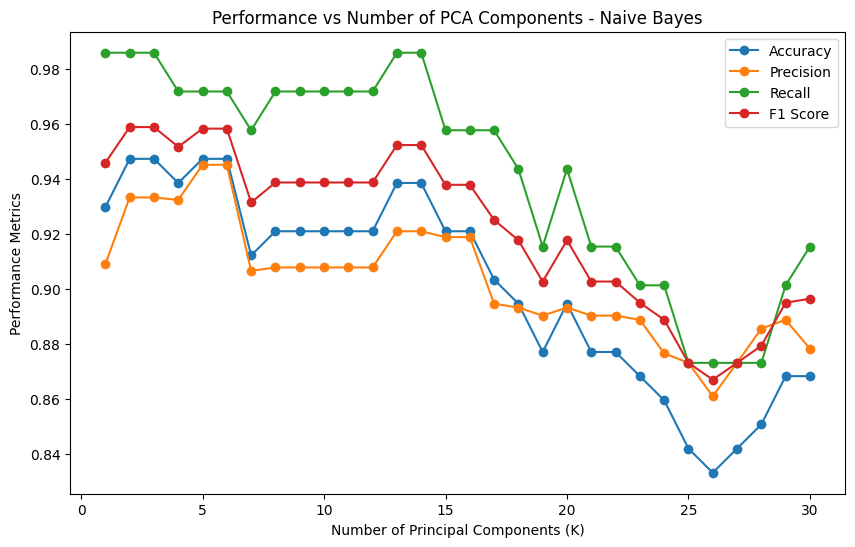

In [93]:
#plotting performance metric
plt.figure(figsize=(10, 6))
plt.plot(results[:, 0], results[:, 1], label='Accuracy', marker='o')
plt.plot(results[:, 0], results[:, 2], label='Precision', marker='o')
plt.plot(results[:, 0], results[:, 3], label='Recall', marker='o')
plt.plot(results[:, 0], results[:, 4], label='F1 Score', marker='o')

plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Performance Metrics')
plt.title('Performance vs Number of PCA Components - Naive Bayes')
plt.legend()
plt.show()


In [94]:
#train final model with best k
pca = PCA(n_components=best_k)
X_train_pca = pca.fit_transform(Xc_train)
X_test_pca = pca.transform(Xc_test)

In [95]:
#train naive bayes on optimize k
final_model = GaussianNB()
final_model.fit(X_train_pca, yc_train)

GaussianNB()

In [96]:
#evaluation
y_test_pred = final_model.predict(X_test_pca)

In [97]:
#final performance metric
final_accuracy = accuracy_score(yc_test, y_test_pred)
final_precision = precision_score(yc_test, y_test_pred)
final_recall = recall_score(yc_test, y_test_pred)
final_f1 = f1_score(yc_test, y_test_pred)

print(f"Final Accuracy: {final_accuracy:.2f}")
print(f"Final Precision: {final_precision:.2f}")
print(f"Final Recall: {final_recall:.2f}")
print(f"Final F1 Score: {final_f1:.2f}")


Final Accuracy: 0.95
Final Precision: 0.93
Final Recall: 0.99
Final F1 Score: 0.96
